In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
import os

RAW_DATA_DIR = os.path.join(os.getcwd(), "data/raw_data/")

In [7]:
images_names = os.listdir(RAW_DATA_DIR)
print(f"Total images: {len(images_names)}")

Total images: 46


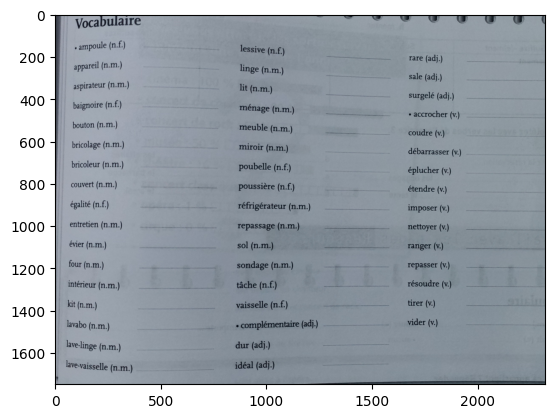

In [14]:
original_image = cv2.imread(os.path.join(RAW_DATA_DIR, images_names[45]))
plt.imshow(original_image)

image = original_image.copy()

In [37]:
def preprocess_image(image: np.ndarray):

    image_gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return image_gray_scale

In [ ]:
image_gray_scale = preprocess_image(image.copy())

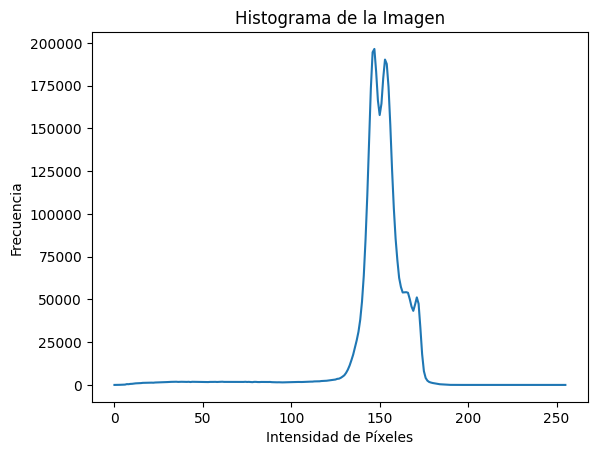

In [40]:
# Calcula el histograma
hist = cv2.calcHist([image_gray_scale], [0], None, [256], [0, 256])

# Muestra el histograma
plt.plot(hist)
plt.title('Histograma de la Imagen')
plt.xlabel('Intensidad de Píxeles')
plt.ylabel('Frecuencia')
plt.show()

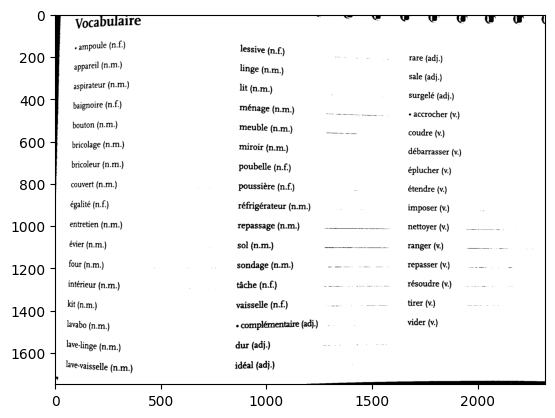

In [42]:
def threshold_image(image: np.ndarray):
    
    _, image_threshold = cv2.threshold(src=image,
                                thresh=0,
                                maxval=255,
                                type=cv2.THRESH_BINARY + cv2.THRESH_OTSU
                                )
    
    return image_threshold

image_threshold = threshold_image(image_gray_scale)
plt.imshow(image_threshold, cmap='gray')

In [61]:
def normalize_image(image: np.ndarray):
    min_value = np.min(image)
    max_value = np.max(image)

    # Min-Max Normalization
    normalized_image = (image - min_value) / (max_value - min_value)

    # Normalize image size
    normalized_image = cv2.resize(
        src=normalized_image,
        dsize=(1920,1080),
        interpolation=cv2.INTER_AREA,
    )

    return normalized_image

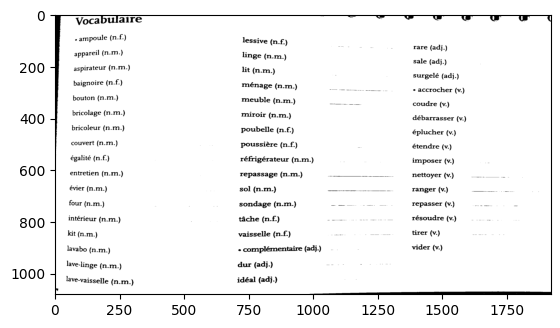

In [62]:
image_normalized = normalize_image(image_threshold)
plt.imshow(image_normalized, cmap='gray')

In [66]:
from datetime import datetime

def save_image(image: np.ndarray):
    file_name = f"img_{datetime.now().strftime('%Y_%m_%d_%H_%M_%S')}.jpg"
    file_path = os.path.join(os.getcwd(), "data/preprocessed_data/", file_name)
    cv2.imwrite(
        filename=file_path,
        img=(image * 255).astype(np.uint8),
    )

In [68]:
save_image(image_normalized)